In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
np.random.seed(123)

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# Load pre-shuffled data into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print(x_train.shape)

(60000, 28, 28)


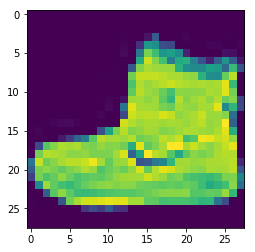

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [6]:
print(K.image_data_format()) # difference between Theano and TensorFlow
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

channels_last


In [7]:
x_train = x_train.astype('float32') # x_train.dtype
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define model structure

In [15]:
# declaring a sequential model format
model = Sequential()

In [16]:
# declare the input layer
model.add(Flatten(input_shape=input_shape))
model.add(Dense(1024, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(1024, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
None


# Fit model on training data

In [19]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
          validation_data=(x_test, y_test))

W0908 18:45:11.851482 12960 deprecation.py:323] From c:\users\wlou\ml\env\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0908 18:45:11.999895 12960 deprecation_wrapper.py:119] From c:\users\wlou\ml\env\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0908 18:45:12.010890 12960 deprecation_wrapper.py:119] From c:\users\wlou\ml\env\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0908 18:45:12.204347 12960 deprecation_wrapper.py:119] From c:\users\wlou\ml\env\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 38s 634us/step - loss: 0.8776 - acc: 0.6776 - val_loss: 0.6200 - val_acc: 0.7656
Epoch 2/12
60000/60000 [==============================] - 37s 611us/step - loss: 0.5416 - acc: 0.8002 - val_loss: 0.5352 - val_acc: 0.8063
Epoch 3/12
60000/60000 [==============================] - 35s 576us/step - loss: 0.4842 - acc: 0.8223 - val_loss: 0.4966 - val_acc: 0.8128
Epoch 4/12
60000/60000 [==============================] - 34s 569us/step - loss: 0.4532 - acc: 0.8347 - val_loss: 0.5242 - val_acc: 0.7982
Epoch 5/12
60000/60000 [==============================] - 35s 588us/step - loss: 0.4300 - acc: 0.8437 - val_loss: 0.4787 - val_acc: 0.8200
Epoch 6/12
60000/60000 [==============================] - 36s 599us/step - loss: 0.4122 - acc: 0.8500 - val_loss: 0.4402 - val_acc: 0.8360
Epoch 7/12
60000/60000 [==============================] - 35s 587us/step - loss: 0.3965 - acc: 0.8555 - val_loss: 0.

# Evaluate model on test data

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41768732266426084
Test accuracy: 0.8479
